# Pseudospace ordering of cell population along follicular axis

In [1230]:
s_groups_2nd = loadData_v1(path_output, exp_id, 's_groups_2nd', 'Series')

In [1231]:
IFE_fitted = loadData_v1(path_output, exp_id, 'IFE_fitted', 'DataFrame')
IFE_stats = loadData_v1(path_output, exp_id, 'IFE_stats', 'DataFrame')

In [1232]:
IFE_corr_max = loadData_v1(path_output, exp_id, 'IFE_corr_max', 'Series')

## Select basal IFE and HF cells. For HF, use uHF and OB cells with pseudotime <= 300. Although not  basal, include cells from IB I to model transition from OB to IB signature. To avoid contamination from early differentiation-specific genes in the IFE (e.g. Mt4) select IFE cells more stringently (< 150)

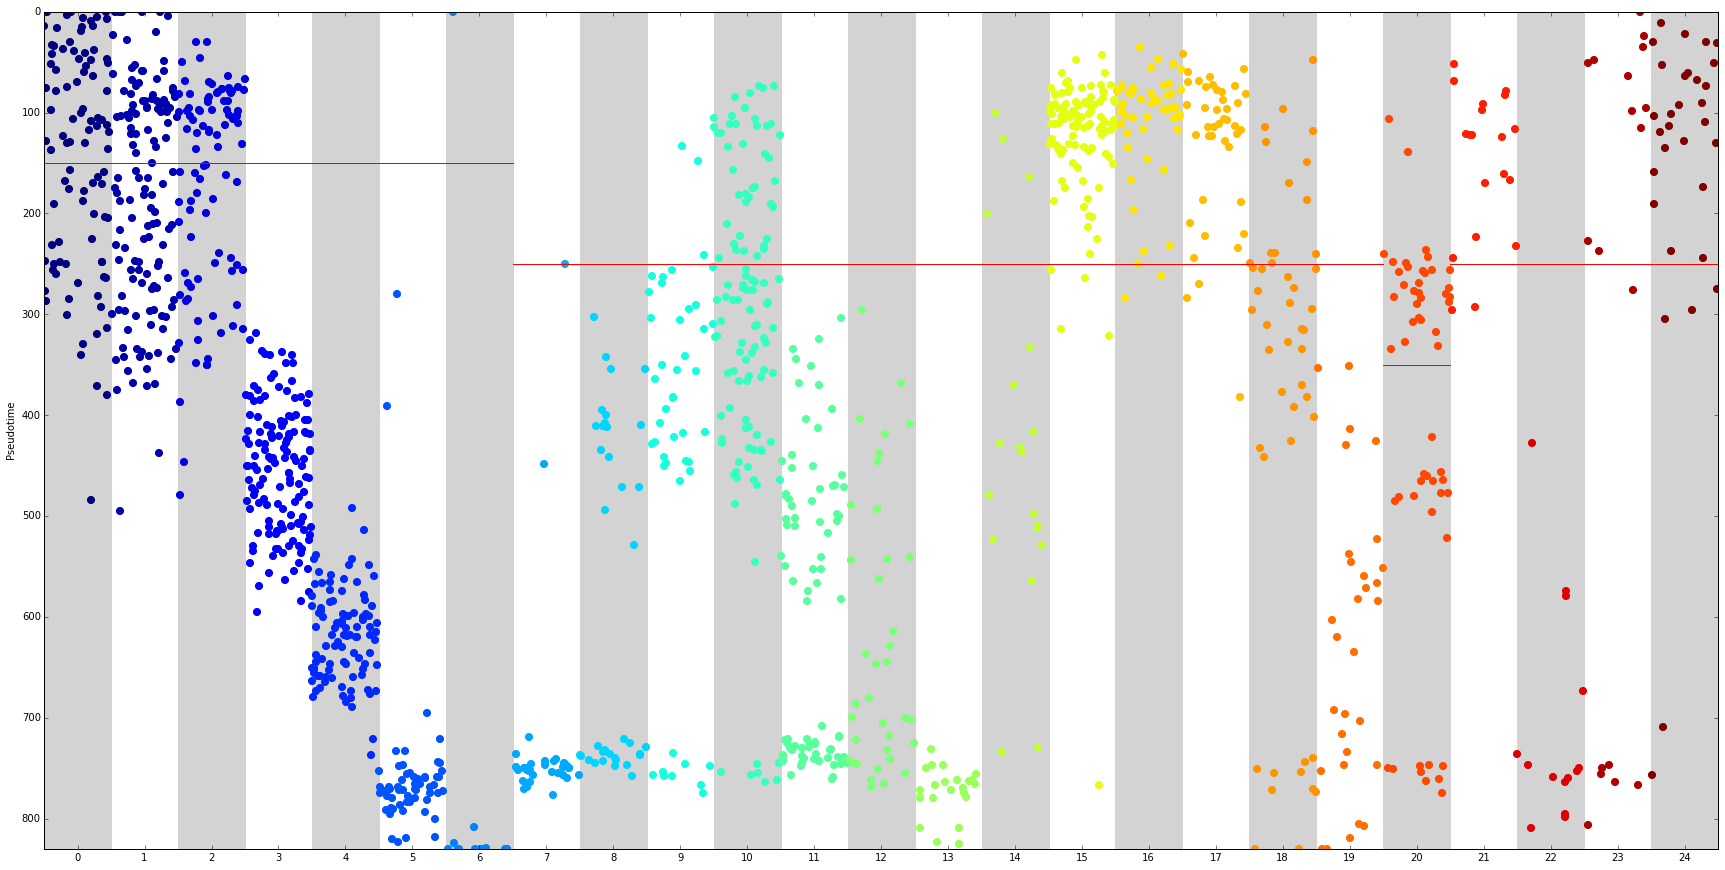

In [1674]:
data = IFE_corr_max
cell_groups = s_groups_2nd
cmap = plt.cm.jet

#initialize figure

height = 15
width = 30

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define axis

ax = plt.subplot()

ax.set_ylim(np.max(data),0)
ax.set_ylabel('Pseudotime')

ax.set_xlim(-0.5, len(return_unique(cell_groups)) - 0.5)
ax.set_xticks(range(len(return_unique(cell_groups))))
ax.set_xticklabels(return_unique(cell_groups))

#plot data

for pos, gr in enumerate(return_unique(cell_groups)):
    
    cell_ix_tmp = cell_groups[cell_groups==gr].index
    
    ax.scatter([pos - 0.5 + np.random.random() for x in range(len(cell_ix_tmp))],
                [float(data[ix]) for ix in cell_ix_tmp],
                color = cmap(gr / float(np.max(cell_groups))),
                s = 50)
    
    #plot background
    
    if pos % 2 == 0:
        
        ax.axvspan(pos - 0.5, pos + 0.5, color = 'lightgrey', zorder = 0)
        
ax.axhline(150, 0, 7./25., color = 'red')
ax.axhline(300, 7./25, 20./25, color = 'red')
ax.axhline(350, 20./25, 21./25, color = 'red')
ax.axhline(300, 21./25, 1, color = 'red')

In [1859]:
cells_IFE = s_groups_2nd[s_groups_2nd.isin([0,1,2,3,4,5,6])].index
cells_basal_IFE = IFE_corr_max[cells_IFE][IFE_corr_max[cells_IFE]<=150].index

cells_HF = s_groups_2nd[s_groups_2nd.isin([10,11,12,13,15,16,17,18,19,20,21,22])].index
cells_basal_HF = IFE_corr_max[cells_HF][IFE_corr_max[cells_HF]<=300].index

#cells_IB = s_groups_2nd[s_groups_2nd.isin([20])].index
#cells_sel_IB = IFE_corr_max[cells_IB][IFE_corr_max[cells_IB]<=350].index

cells_spatial = list(cells_basal_IFE) + list(cells_basal_HF) #+ list(cells_sel_IB)

In [1860]:
len(cells_spatial)

486

In [1861]:
Counter(s_groups_2nd.ix[cells_spatial])

Counter({0: 54,
         1: 61,
         2: 51,
         6: 1,
         10: 60,
         12: 1,
         15: 102,
         16: 51,
         17: 40,
         18: 22,
         20: 24,
         21: 19})

## Select features


Dropping spikes from dataset

Dropping repeats from dataset

Dropping unexpressed genes from dataset

After mean expression cutoff of 0.1, 6788 genes remain

After correlation cutoff of 5, 6788 genes remain

Optimization terminated successfully.
         Current function value: 1325.179233
         Iterations: 27
         Function evaluations: 52

After high variance feature selection, 2500 genes remain

Calculating binary logarithm of x + 1


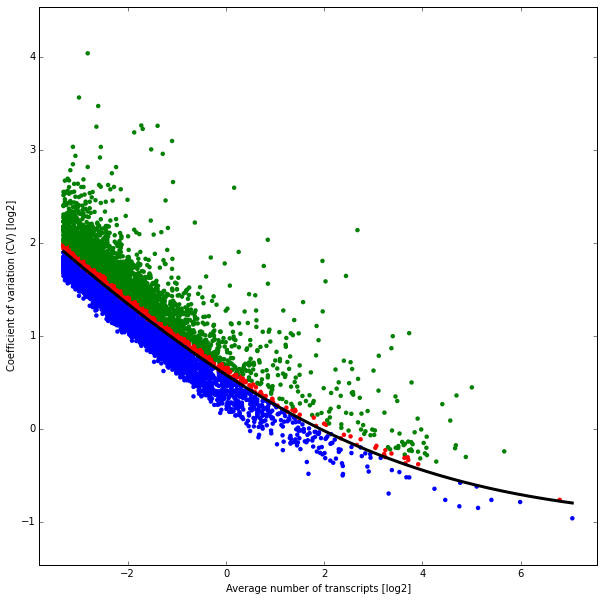

In [1862]:
seq_sel_spatial = select_features_v1(seq[cells_spatial], 0.10, 5, 2500, path_input)

## Remove genes which where identified as early immediate genes (#2) and housekeeping genes (#0) in the 1st lvl clustering

In [1863]:
genes_sel = list(set(seq_sel_spatial.index.difference(g_groups_1st[g_groups_1st.isin([2,0])].index)))

seq_sel_spatial = log2Transform(seq.ix[genes_sel, cells_spatial])


Calculating binary logarithm of x + 1


In [1864]:
len(seq_sel_spatial.index)

2252

## Checkpoint

In [1865]:
saveData_v1(seq_sel_spatial, path_output, exp_id, 'seq_sel_spatial')

In [1866]:
seq_sel_spatial = loadData_v1(path_output, exp_id, 'seq_sel_spatial', 'DataFrame')

## Cluster cells I

In [1867]:
preference = np.arange(-3.0, 0.0, 0.1)
damping = np.arange(0.5, 0.9, 0.05)

In [1868]:
affy_s_spatial = seq_sel_spatial.corr()
dist_s_spatial = 1 - affy_s_spatial

          -3.0      -2.9      -2.8      -2.7      -2.6      -2.5      -2.4  \
0.50  -460.341 -458.5564  -460.341  -460.341  -461.422 -460.4668 -459.9915   
0.55  -460.341  -460.341 -460.3791 -458.5564 -460.3412  -460.341 -459.9915   
0.60  -460.341 -458.5564 -460.3791  -460.341 -458.5564 -459.9915 -459.9915   
0.65 -458.5564 -458.5564 -458.5564 -458.5564 -458.5564 -458.5564 -460.4668   
0.70 -461.9334 -461.9334 -458.5564 -458.5564 -458.5564 -458.5564 -459.9915   
0.75  -460.341  -460.341  -460.341  -461.422 -459.9915 -460.4668 -459.4889   
0.80 -460.9788 -460.0514 -461.4194 -460.0514 -460.0514 -460.0514 -459.4889   
0.85 -460.9788 -460.9788 -460.0514 -460.0514 -460.0514 -459.4889 -459.4889   

          -2.3      -2.2      -2.1    ...         -1.0      -0.9      -0.8  \
0.50 -459.4889 -460.4668 -460.4668    ...    -452.0287 -452.0287 -452.0287   
0.55  -460.341  -459.049 -458.3542    ...    -452.0287 -452.6004 -452.6004   
0.60 -460.1185 -459.4889 -460.1185    ...    -452.6004 -452.600

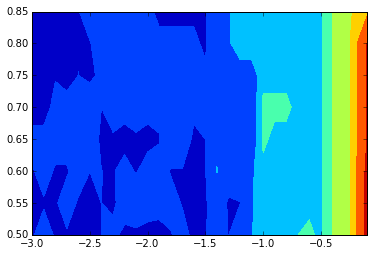

In [1869]:
IC_s, Ng_s = AP_IC_v3P(seq_sel_spatial, affy_s_spatial, 0, 'precomputed', preference, damping, path_scripts, dview, linkage='single', criterion='BIC')
print IC_s, Ng_s, plt.contourf(IC_s.columns, IC_s.index, IC_s)

In [1870]:
pref_s, damp_s = AP_IC_findmin(IC_s)
print pref_s, damp_s

-3.0 0.7


In [1871]:
s_groups_spatial = AP_clustering_v3P(seq_sel_spatial, affy_s_spatial, 0, 'precomputed', pref_s, damp_s, path_scripts, linkage = 'single')

In [1872]:
len(set(s_groups_spatial))

2

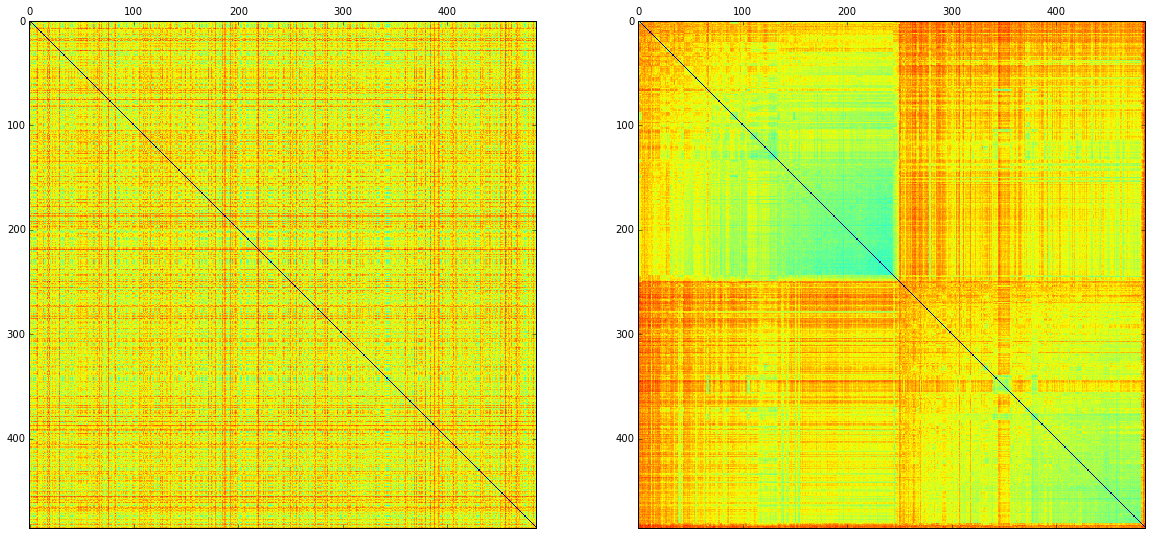

In [1873]:
draw_AP_dist_mat(dist_s_spatial, s_groups_spatial)

## Cluster genes

In [1874]:
preference = np.arange(-5.0, -3.0, 0.1)
damping = np.arange(0.75, 0.9, 0.05)

In [1875]:
affy_g_spatial = seq_sel_spatial.T.corr()
dist_g_spatial = 1 - affy_g_spatial

          -5.0      -4.9      -4.8      -4.7      -4.6      -4.5      -4.4  \
0.75 -1430.996 -1443.534 -1443.871 -1450.206 -1445.414 -1445.414 -1452.843   
0.80 -1435.903 -1435.903 -1435.903 -1457.951 -1459.791 -1459.791 -1459.791   
0.85 -1449.357 -1449.357 -1449.357 -1449.256 -1469.468 -1455.143 -1457.187   
0.90 -1435.903 -1459.791 -1459.791 -1443.534 -1443.534 -1443.534 -1443.534   

          -4.3      -4.2      -4.1      -4.0      -3.9      -3.8      -3.7  \
0.75 -1448.623   -1472.2 -1476.612 -1446.468 -1460.075 -1482.734 -1481.603   
0.80 -1459.791 -1459.791 -1440.865 -1440.865 -1440.865 -1464.017 -1464.017   
0.85 -1455.143 -1455.143 -1453.399 -1457.843 -1473.908 -1466.261 -1471.904   
0.90 -1443.534 -1443.534 -1443.534 -1440.865 -1472.524 -1472.524 -1464.017   

          -3.6      -3.5      -3.4      -3.3      -3.2      -3.1  
0.75 -1433.898 -1466.413 -1451.691  -1458.36 -1464.788  -1481.01  
0.80 -1464.017 -1462.464  -1456.21 -1475.135 -1475.135 -1475.856  
0.85 -1471.904 -1

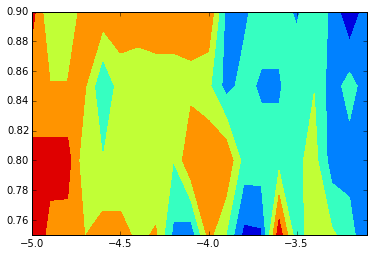

In [1876]:
IC_g, Ng_g = AP_IC_v3P(seq_sel_spatial, affy_g_spatial, 1, 'precomputed', preference, damping, path_scripts, dview, linkage='single', criterion='BIC')
print IC_g, Ng_g, plt.contourf(IC_g.columns, IC_g.index, IC_g)

In [1877]:
pref_g, damp_g = AP_IC_findmin(IC_g)
print pref_g, damp_g

-3.2 0.9


In [1878]:
g_groups_spatial = AP_clustering_v3P(seq_sel_spatial, affy_g_spatial, 1, 'precomputed', pref_g, damp_g, path_scripts, linkage = 'single')

In [1879]:
len(set(g_groups_spatial))

17

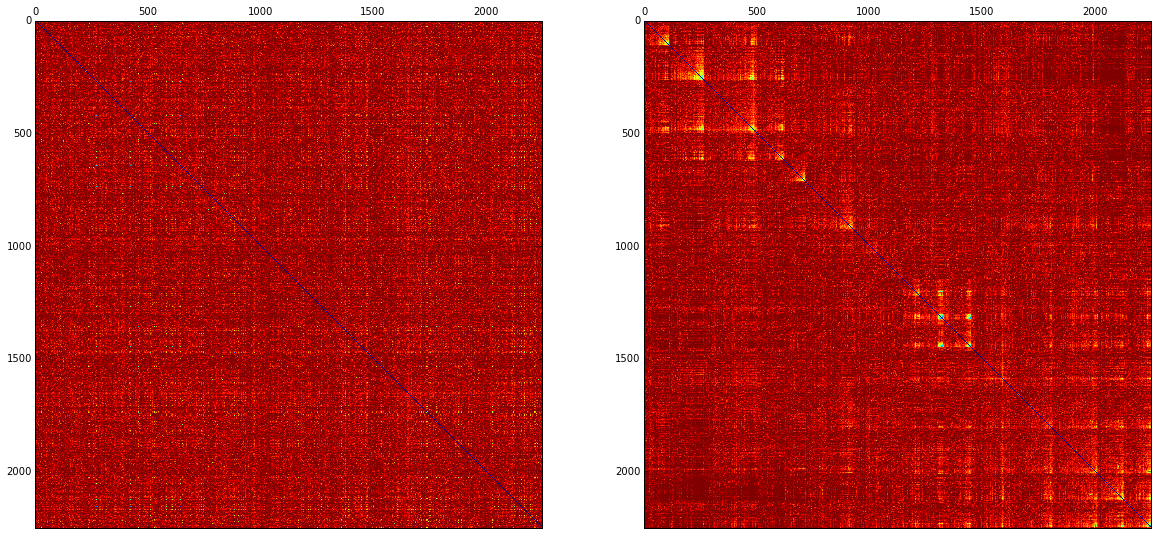

In [1880]:
draw_AP_dist_mat(dist_g_spatial, g_groups_spatial)

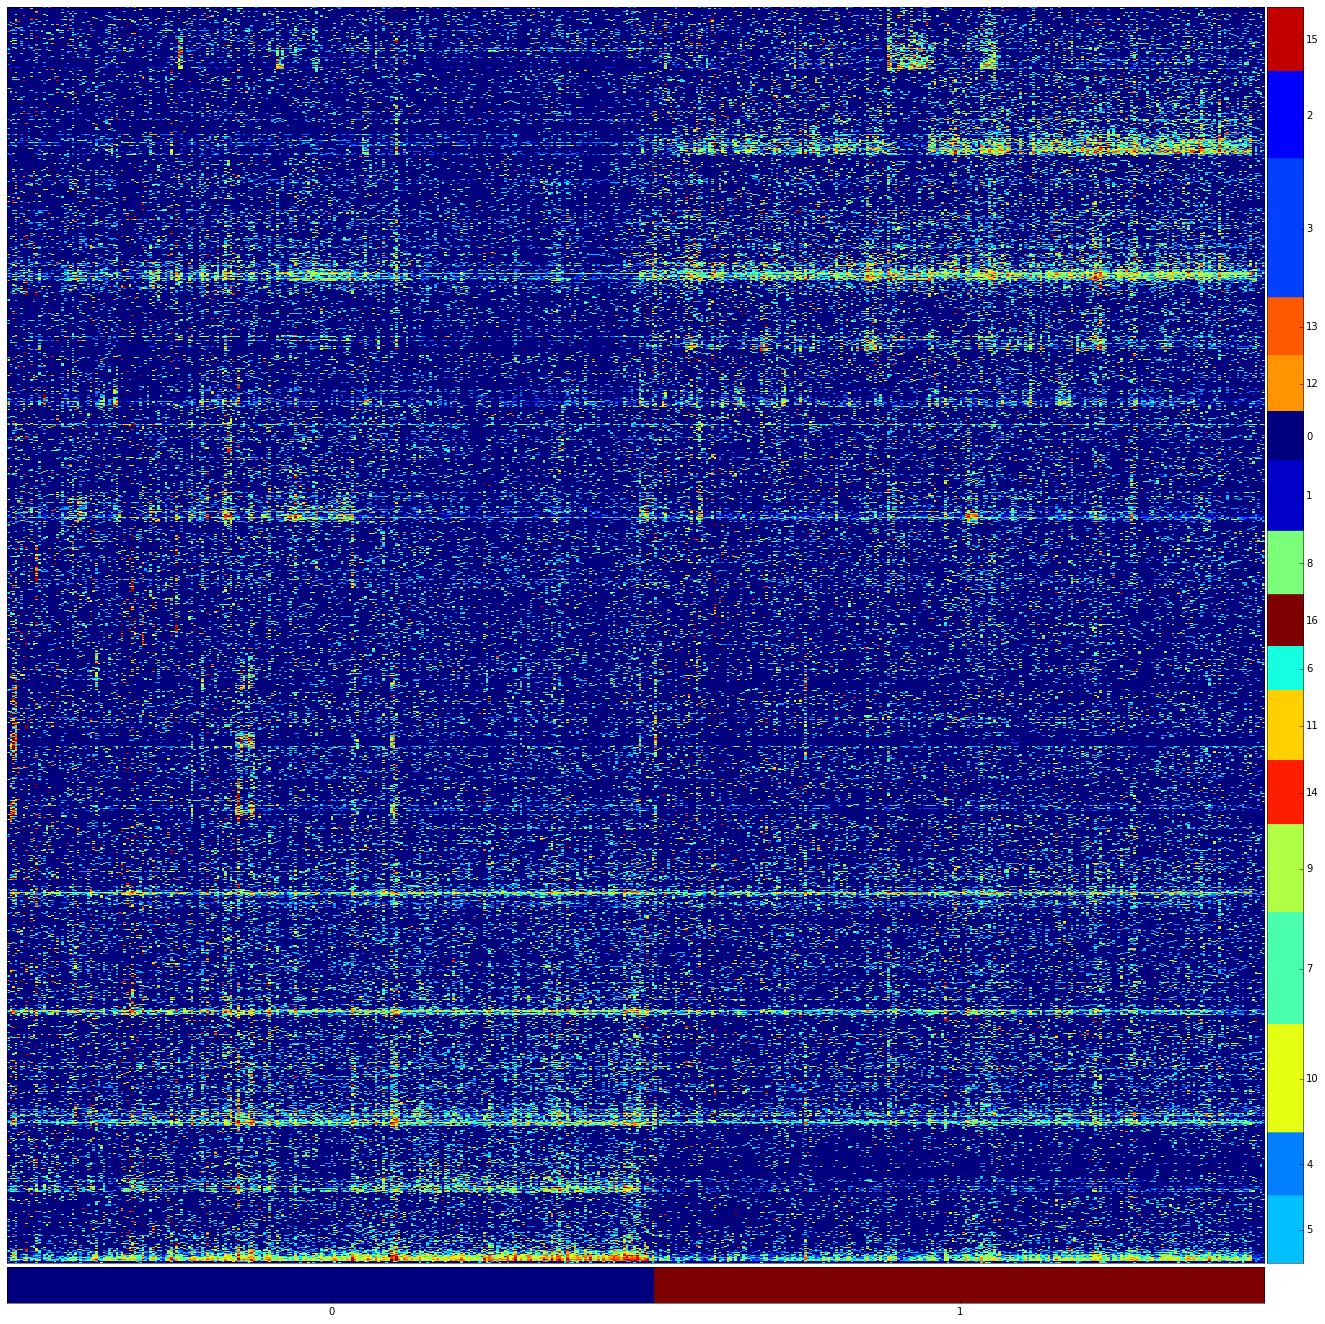

In [1881]:
draw_heatmap(seq_sel_spatial, s_groups_spatial, g_groups_spatial)

## Select groups #4  (IFE basal), #1 (uHF), #15 (inner bulge) and #2, #3, #13  (outer bulge and pan-HF) as relevant spatial signatures for pseudospace ordering.

In [1883]:
genes_sel = g_groups_spatial[g_groups_spatial.isin([4,1,15,2,3,13])].index

In [1884]:
len(genes_sel)

865

## Perform t-SNE

In [1885]:
seq_sel_spatial = seq_sel_spatial.ix[genes_sel]

In [1886]:
dist_mat_tsne_spatial = 1 - seq_sel_spatial.corr()

In [2357]:
"""
tsne_coords_spatial = find_tSNE_v1P(dist_mat_tsne_spatial, s_groups_2nd, 60, dview, perplexity=20, early_exaggeration=3.0, learning_rate=1000.0,                             
                                        n_iter=1000, init='random', verbose=0, random_state=None)
"""

"\ntsne_coords_spatial = find_tSNE_v1P(dist_mat_tsne_spatial, s_groups_2nd, 60, dview, perplexity=20, early_exaggeration=3.0, learning_rate=1000.0,                             \n                                        n_iter=1000, init='random', verbose=0, random_state=None)\n"

In [1891]:
tsne_spatial = tsne_coords_spatial[58]

## Pseudospatial ordering

In [1892]:
dist_mat_tsne = pairwise_distance_2d(tsne_spatial)


Creating MST

Diameter path between 1772067055-G12 and 1772071025-A12 with lenght 142

Creating PQ-Tree

Finding permutations

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133

Returning coordinates



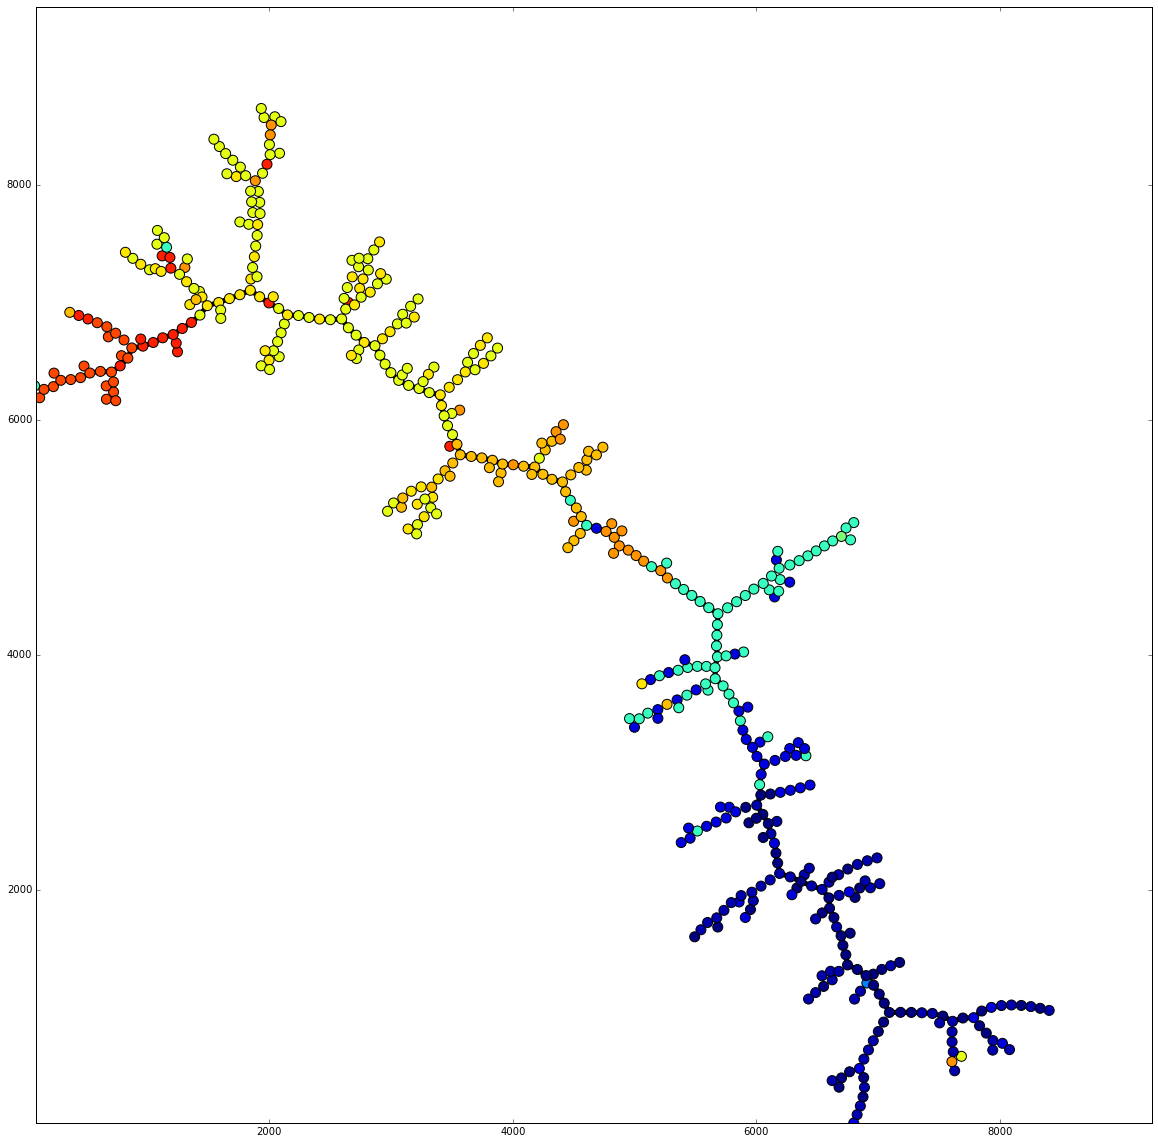

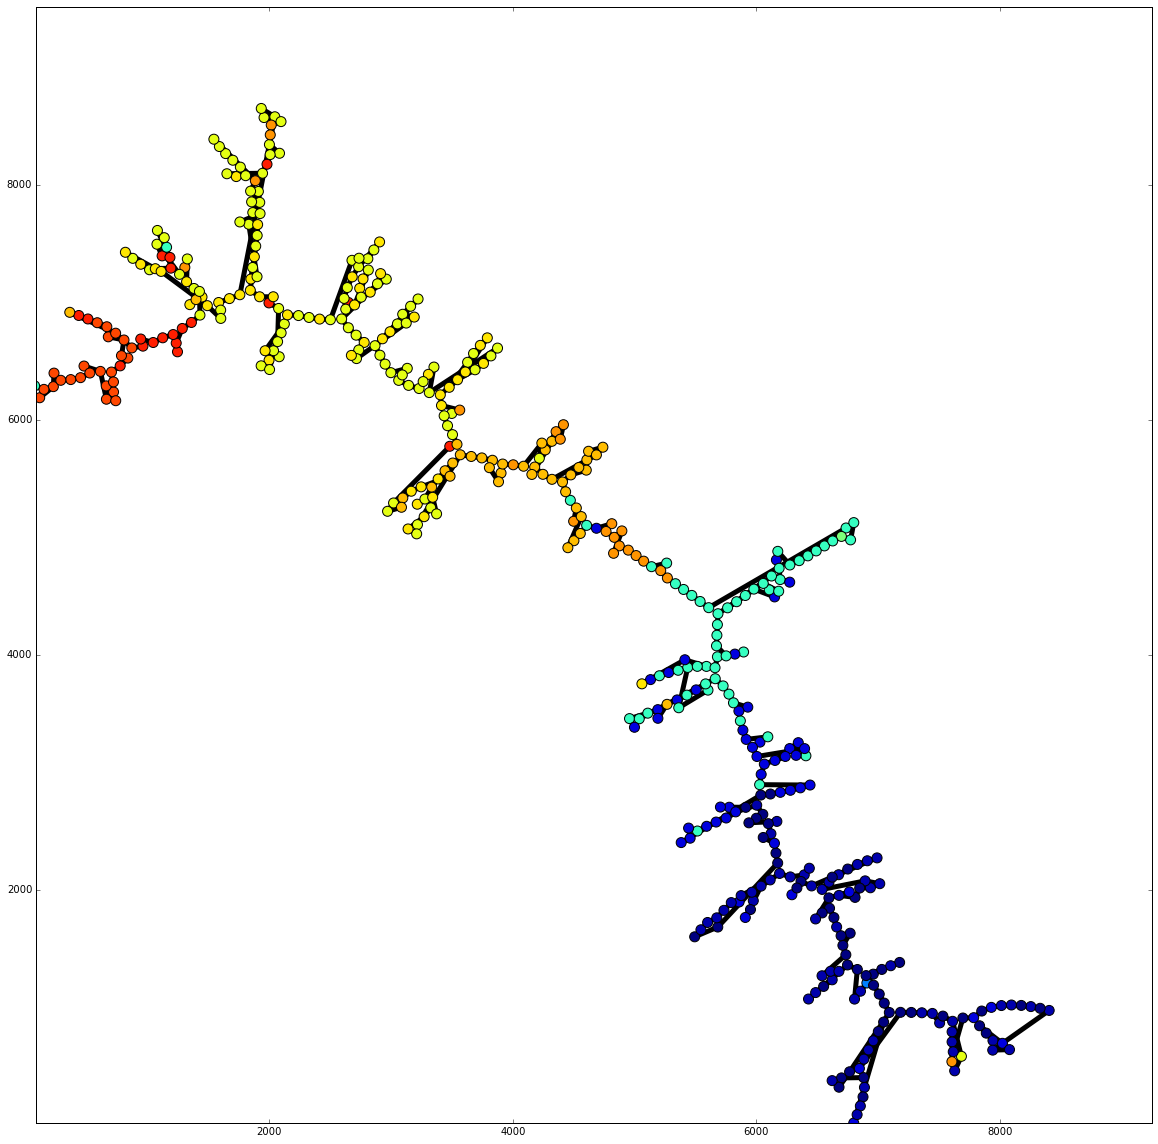

In [1893]:
PTO_coords_spatial = PTO_create_pseudotemporal_ordering_2d(dist_mat_tsne, s_groups_2nd)


Calculating binary logarithm of x + 1


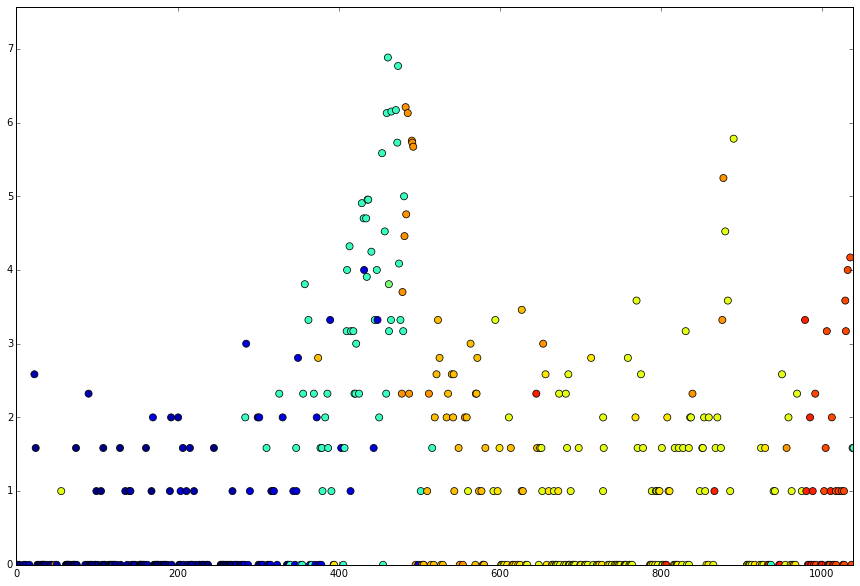

In [1895]:
PTO_plot_gene(log2Transform(seq), PTO_coords_spatial, s_groups_2nd, 'Krt79')

## Checkpoint

In [1897]:
saveData_v1(PTO_coords_spatial, path_output, exp_id, 'PTO_coords_spatial')
saveData_v1(tsne_spatial, path_output, exp_id, 'tsne_spatial')

In [1898]:
PTO_coords_spatial = loadData_v1(path_output, exp_id, 'PTO_coords_spatial', 'Series')
tsne_spatial = loadData_v1(path_output, exp_id, 'tsne_spatial', 'DataFrame')

## Comparison with data from points in multidimensional space


Creating MST

Diameter path between 1772067087-A02 and 1772067055-A04 with lenght 29

Creating PQ-Tree

Finding permutations

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24

Returning coordinates



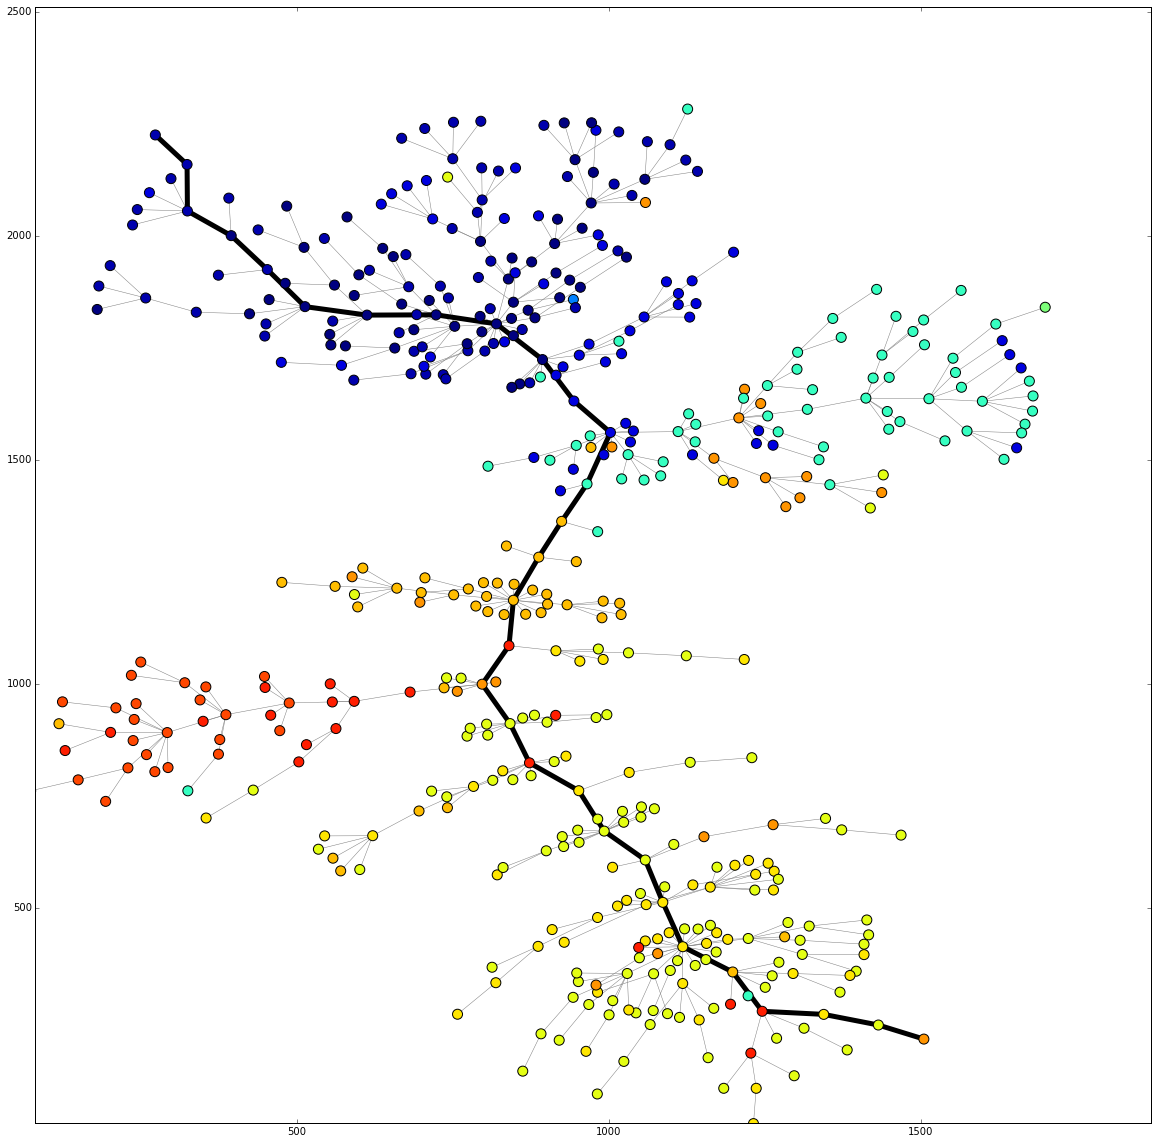

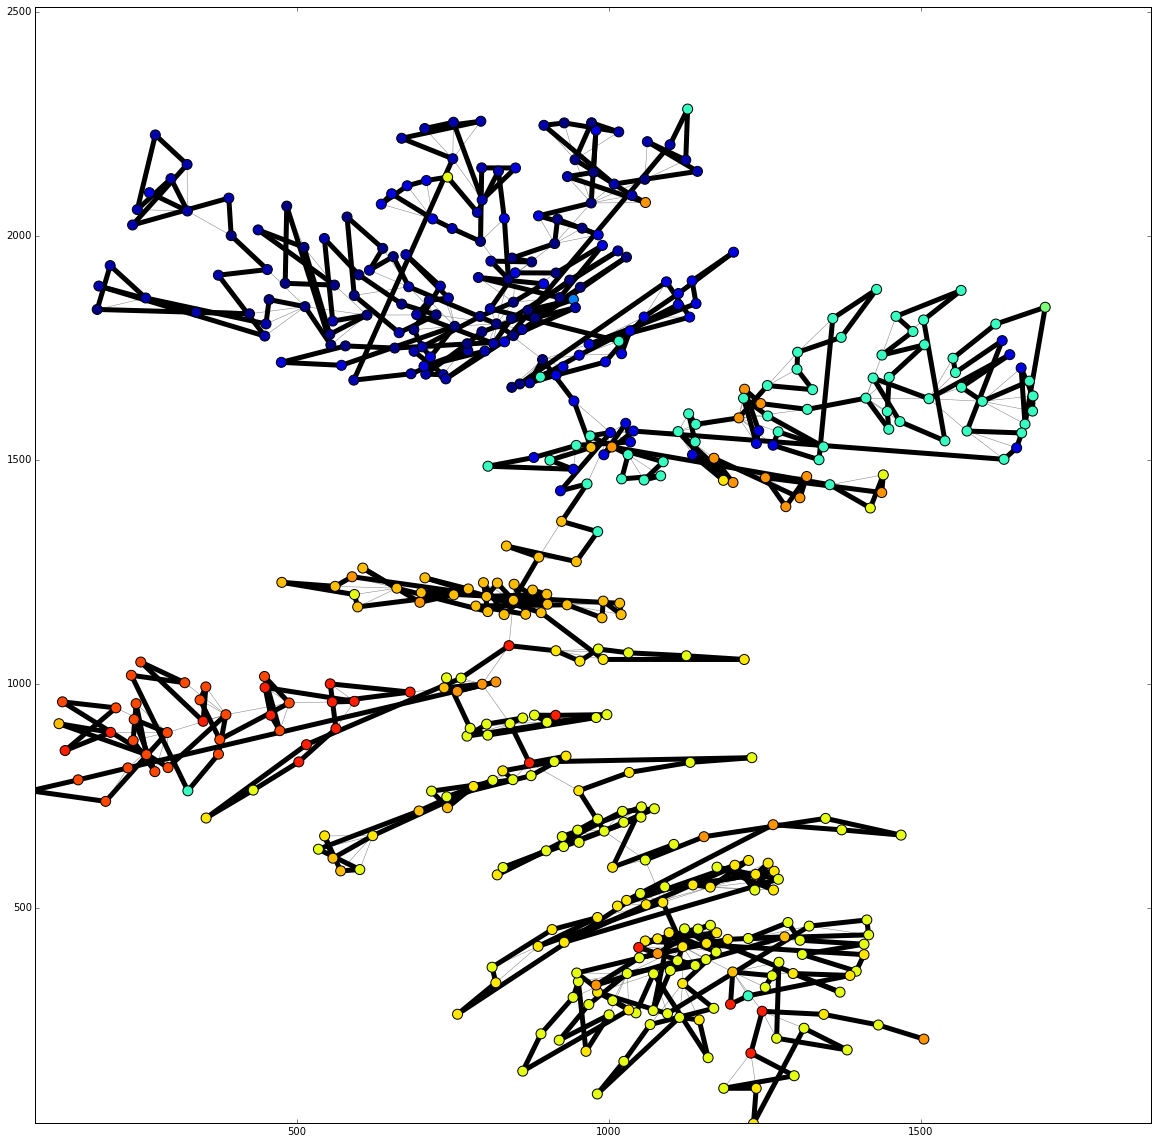

In [1896]:
PTO_coords_spatial_multi = PTO_create_pseudotemporal_ordering(seq_sel_spatial, s_groups_2nd)

## Checkpoint

In [1899]:
saveData_v1(PTO_coords_spatial_multi, path_output, exp_id, 'PTO_coords_spatial_multi')

## Robustness of pseudospatial ordering

In [1900]:
PTO_coords_spatial_tSNE_it = PTO_robustness_tsne(seq_sel_spatial, 100, dview, 'tSNE_iterations', perplexity=25.0)

In [1901]:
PTO_coords_spatial_tSNE_res = PTO_robustness_tsne(seq_sel_spatial, 100, dview, 'tSNE_resampling', perplexity=25.0, resampling=0.25)

In [1902]:
PTO_coords_spatial_tSNE_shf = PTO_robustness_tsne(seq_sel_spatial, 100, dview, 'tSNE_shuffling', perplexity=25.0)

## Checkpoint

In [1903]:
saveData_v1(PTO_coords_spatial_tSNE_it, path_output, exp_id, 'PTO_coords_spatial_tSNE_it')
saveData_v1(PTO_coords_spatial_tSNE_res, path_output, exp_id, 'PTO_coords_spatial_tSNE_res')
saveData_v1(PTO_coords_spatial_tSNE_shf, path_output, exp_id, 'PTO_coords_spatial_tSNE_shf')

## Cubic spline fitting

In [1904]:
seq_spatial = dropNull(seq[PTO_coords_spatial.index], path_input, cutoff_mean=0.10)


Dropping spikes from dataset

Dropping repeats from dataset

Dropping unexpressed genes from dataset


In [1905]:
len(seq_spatial.index)

6788

In [1906]:
spatial_fitted, spatial_stats = fit_vgam(seq_spatial, PTO_coords_spatial, list(seq_spatial.index), 5)

## Checkpoint

In [1907]:
saveData_v1(spatial_fitted, path_output, exp_id, 'spatial_fitted')
saveData_v1(spatial_stats, path_output, exp_id, 'spatial_stats')

In [220]:
spatial_fitted = loadData_v1(path_output, exp_id, 'spatial_fitted', 'DataFrame')
spatial_stats = loadData_v1(path_output, exp_id, 'spatial_stats', 'DataFrame')

## Select pseudospace-dependent genes (cutoff p-value: 0.001; Bonferroni corrected)

In [221]:
bonferroni = 0.001 / len(spatial_stats.index)

In [222]:
print bonferroni

1.47318797879e-07


In [223]:
genes_PSO_spatial = spatial_stats['Pr(>Chisq)'][spatial_stats['Pr(>Chisq)'] < bonferroni].index

In [224]:
len(genes_PSO_spatial)

547

## Correlate cells to pseudospace

In [1914]:
pseudospace_corr = PTO_correlate(log2Transform(seq), log2Transform(spatial_fitted), s_groups_2nd.index, genes_PSO_spatial, return_p=False)


Calculating binary logarithm of x + 1

Calculating binary logarithm of x + 1


In [1915]:
pseudospace_corr_max = PTO_correlate_find_max(pseudospace_corr)

## Checkpoint

In [1916]:
saveData_v1(pseudospace_corr_max, path_output, exp_id, 'pseudospace_corr_max')

In [268]:
pseudospace_corr_max = loadData_v1(path_output, exp_id, 'pseudospace_corr_max', 'Series')

## Cluster pseudospace-dependend genes

In [2358]:
#log2 transform splines

spatial_fitted_ = log2Transform(spatial_fitted)


Calculating binary logarithm of x + 1


In [2359]:
spatial_fitted_sel = spatial_fitted_.ix[genes_PSO_spatial]

In [2360]:
len(spatial_fitted_sel.index)

547

In [2375]:
preference = np.arange(-4.0, -1.0, 0.1)
damping = np.arange(0.65, 0.95, 0.05)

In [2376]:
affy_g_spatial = spatial_fitted_sel.T.corr()
dist_g_spatial = 1 - affy_g_spatial

          -4.0      -3.9      -3.8      -3.7      -3.6      -3.5      -3.4  \
0.65  76.01077  81.01504  75.19646  74.93594  77.59014  26.77894  76.75079   
0.70  55.46151  55.46151  58.97127  59.12565  45.88389   54.6215  80.04297   
0.75   59.0138   59.0138  76.75079  55.91352  78.08135  60.48793   59.0138   
0.80   59.0138   59.0138   59.0138  36.72679  62.40634  62.40634  62.40634   
0.85  77.59014  77.59014  77.59014  77.59014  77.59014  77.59014  77.59014   
0.90  77.59014  77.59014  77.59014  77.59014  77.59014  77.59014  77.59014   

          -3.3      -3.2      -3.1    ...         -2.0      -1.9      -1.8  \
0.65  53.33126  51.14289  77.59014    ...     59.95523  57.50369  48.37132   
0.70  70.20544  65.19215  1.751854    ...     59.03196  20.61321   16.8041   
0.75   59.0138  56.65836  57.62521    ...     19.51068  28.97113  29.79069   
0.80  26.77894  27.38796  38.70676    ...     36.24858  27.35463  26.75461   
0.85  26.77894  26.77894  26.77894    ...     33.14185  33.1418

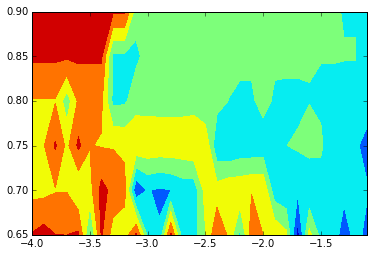

In [2377]:
IC_g, Ng_g = AP_IC_v3P(spatial_fitted_sel, affy_g_spatial, 1, 'precomputed', preference, damping, path_scripts, dview, linkage='single', criterion='BIC')
print IC_g, Ng_g, plt.contourf(IC_g.columns, IC_g.index, IC_g)

In [2381]:
pref_g, damp_g = AP_IC_findmin(IC_g)
print pref_g, damp_g

-1.7 0.65


In [2386]:
g_groups_spatial = AP_clustering_v3P(spatial_fitted_sel, affy_g_spatial, 1, 'precomputed', -3.1, 0.7, path_scripts, linkage = 'single')

In [2387]:
len(set(g_groups_spatial))

8

In [2390]:
g_groups_spatial = AP_groups_reorder(g_groups_spatial, [0,7,1,5,4,2,3,6])

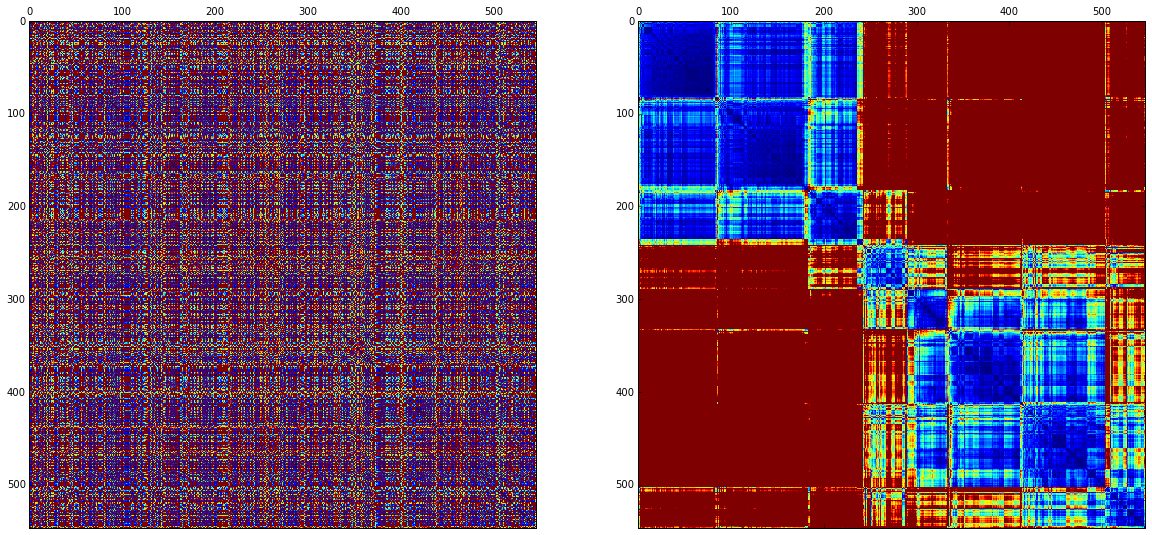

In [2391]:
draw_AP_dist_mat(dist_g_spatial, g_groups_spatial)

## Checkpoint

In [2392]:
saveData_v1(g_groups_spatial, path_output, exp_id, 'g_groups_spatial')

## Evaluate correlation robustness

In [226]:
spatial_corr_robustness = PTO_correlation_robustness_v1P(log2Transform(seq), 
                                                     log2Transform(spatial_fitted), 
                                                     s_groups_1st.index, 
                                                     genes_PSO_spatial, 
                                                     dview, 100, resampling=0.25)


Calculating binary logarithm of x + 1

Calculating binary logarithm of x + 1


In [269]:
spatial_corr_robustness_distance = PTO_correlation_robustness_distance(pseudospace_corr_max, spatial_corr_robustness)

## Checkpoint

In [270]:
saveData_v1(spatial_corr_robustness, path_output, exp_id, 'spatial_corr_robustness')
saveData_v1(spatial_corr_robustness_distance, path_output, exp_id, 'spatial_corr_robustness_distance')